In [1]:
#!/Users/swp7563/Anaconda3/envs/hddmEnv/Scripts
import pandas as pd
import matplotlib.pyplot as plt

import hddm

C:\Users\swp7563\Anaconda3\envs\hddmEnv\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data=hddm.load_csv('C:/Users/swp7563/Anaconda3/envs/hddmEnv/data/ant_ddm.csv')

data.head(10)

,subj_idx,stim,rt,response,threat,group
0,3,congruent,0.407,1,NS,HC
1,3,congruent,0.470,1,NS,HC
2,3,congruent,0.483,1,NS,HC
3,3,incongruent,-999.000,0,NS,HC
4,3,congruent,0.466,1,NS,HC
5,3,incongruent,0.487,1,NS,HC
6,3,congruent,0.477,1,NS,HC
7,3,congruent,0.577,1,NS,HC
8,3,congruent,0.550,1,NS,HC
9,3,congruent,0.454,1,NS,HC


In [3]:
model_stim_x_threat = hddm.HDDM (data, depends_on={'v': ['stim', 'threat']},p_outlier=.05) 
model_stim_x_threat.find_starting_values()
model_stim_x_threat.sample(2000, burn=20)

C:\Users\swp7563\Anaconda3\envs\hddmEnv\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 4997.9 sec

In [6]:
v_NS_congruent, v_NS_incongruent, v_SH_congruent, v_SH_incongruent = model_stim_x_threat.nodes_db.node[['v(congruent.NS)', 'v(incongruent.NS)', 'v(congruent.SH)', 'v(incongruent.SH)']]

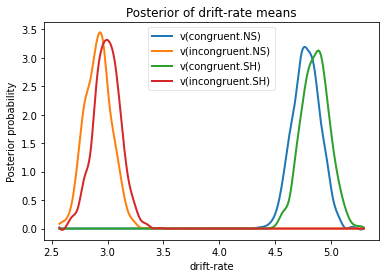

In [7]:
hddm.analyze.plot_posterior_nodes([v_NS_congruent, v_NS_incongruent, v_SH_congruent, v_SH_incongruent])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate means')
plt.savefig('hddm_stim_x_threat.pdf')

In [12]:
"P(congruent.NS > incongruent.NS) = ", (v_NS_congruent.trace() > v_NS_incongruent.trace()).mean()

('P(congruent.NS > incongruent.NS) = ', 1.0)

In [13]:
"P(congruent.SH > incongruent.SH) = ", (v_SH_congruent.trace() > v_SH_incongruent.trace()).mean()

('P(congruent.SH > incongruent.SH) = ', 1.0)

In [14]:
"P(congruent.SH > congruent.NS) = ", (v_SH_congruent.trace() > v_NS_congruent.trace()).mean()

('P(congruent.SH > congruent.NS) = ', 0.6767676767676768)

In [15]:
"P(incongruent.SH > incongruent.NS) = ", (v_SH_incongruent.trace() > v_NS_incongruent.trace()).mean()

('P(incongruent.SH > incongruent.NS) = ', 0.6767676767676768)